## 데이터 표준화

### 단위 환산

In [ ]:
import pandas as pd

In [ ]:
# 데이터 불러오기
# csv 파일 불러오기 + 열 이름이 없음(header = None)
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv', header = None)

In [ ]:
# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
# 연비 mpg = mile per gallon
# kpl = kilometer per liter
# 1 mpg = 0.425 kpl
kpl = 0.425
df['kpl'] = df['mpg'] * kpl
df['kpl'] = df['kpl'].round(1)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  kpl  
0       1  chevrolet chevelle malibu  7.6  
1       1          buick skylark 320  6.4  
2       1         plymouth satellite  7.6  
3       1              amc rebel sst  6.8  
4       1                ford torino  7.2  


## 자료형 변환

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.6
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.6
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.8
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.2


In [ ]:
# 1) 숫자가 문자열로 저장되어 있다면 숫자로 변환 => 수치형 변수
# 데이터 자료형
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
kpl             float64
dtype: object

In [ ]:
# 어떤 문자열이 들어갔는지 확인하는 방법
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
import numpy as np
# ? => NaN
df['horsepower'].replace("?", np.nan, inplace = True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# NaN 행 삭제
df.dropna(subset = 'horsepower', axis = 0, inplace = True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# 문자열을 숫자로 변환
df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
kpl             float64
dtype: object

In [ ]:
# 2) 숫자가 숫자의 의미가 아닌 경우 => 범주형 변수
# origin 변수는 1, 2, 3 숫자를 가지고 있음
# 1: 미국, 2: 유럽, 3: 일본
df['origin'].unique()

array([1, 3, 2])

In [ ]:
# 특정 열의 자료형
df['origin'].dtypes

dtype('int64')

In [ ]:
# 숫자를 범주형으로 변환
df['origin'] = df['origin'].astype('category')
df['origin'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [ ]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
df['model_year'].dtypes

dtype('int64')

In [ ]:
df['model_year'] = df['model_year'].astype('category')
df['model_year'].dtypes

CategoricalDtype(categories=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], ordered=False)

## 범주형 데이터 처리

### 구간 분할

In [ ]:
# 마력 실수형 = 수치형 변수 => 범주형 변수
print(df.horsepower.dtypes)
print(df.horsepower[:5])

float64
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64


In [ ]:
# 구간 설정
import numpy as np
# 히스토그램 이용해서 빈도과 구간 가져오기
count, bins = np.histogram(df['horsepower'], bins = 3) # 기본값 bins 10개

In [ ]:
print(count, bins)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 범주형 변환
bins_name = ["저출력","보통출력","고출력"]
df['hp_cat'] = pd.cut(x = df['horsepower'], # 데이터 = 사용할 열
                      bins = bins, # 구간의 값
                      labels = bins_name, # 구간의 이름
                      include_lowest = True) # 구간의 시작값 포함

In [ ]:
print(bins);print(df[['horsepower','hp_cat']])

[ 46.         107.33333333 168.66666667 230.        ]
     horsepower hp_cat
0         130.0   보통출력
1         165.0   보통출력
2         150.0   보통출력
3         150.0   보통출력
4         140.0   보통출력
..          ...    ...
393        86.0    저출력
394        52.0    저출력
395        84.0    저출력
396        79.0    저출력
397        82.0    저출력

[392 rows x 2 columns]


### 더미변수

In [ ]:
hp_dm = pd.get_dummies(df['hp_cat'])
print(df['hp_cat']);print(hp_dm)
print(pd.get_dummies(df['hp_cat'], drop_first=True))

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: hp_cat, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']
     저출력  보통출력  고출력
0      0     1    0
1      0     1    0
2      0     1    0
3      0     1    0
4      0     1    0
..   ...   ...  ...
393    1     0    0
394    1     0    0
395    1     0    0
396    1     0    0
397    1     0    0

[392 rows x 3 columns]
     보통출력  고출력
0       1    0
1       1    0
2       1    0
3       1    0
4       1    0
..    ...  ...
393     0    0
394     0    0
395     0    0
396     0    0
397     0    0

[392 rows x 2 columns]


In [ ]:
# 사이킷런으로 변환하기
from sklearn import preprocessing
# 전처리 엔코더 객체
onehot_encoder = preprocessing.OneHotEncoder()
label_encoder = preprocessing.LabelEncoder()

In [ ]:
print(df['hp_cat'][:15])
# 문자열 범주를 숫자 범주로 변환 = LabelEncoder
labels = label_encoder.fit_transform(df['hp_cat'])
print(labels)
# 고출력 - 보통출력 - 저출력 (글자 순서대로 정렬)
# 0 - 1 - 2
codes, uniques = pd.factorize(df['hp_cat'], sort = True)
print(codes)
print(uniques)
# '저출력', '보통출력', '고출력'(원래는 글자 순서대로 정렬되어야 하지만, 카테고리로 만들면서 고정된 순서대로 정렬)
# 0 - 1 - 2

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_cat, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']
[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 2 2 2 2 2 2 2 2
 1 0 1 1 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 0 1 1 0 2 1 1 1
 1 1 2 2 2 2 2 2 2 2 0 1 1 1 1 0 1 1 1 0 0 0 2 2 2 2 2 2 1 1 0 0 2 2 2 2 2
 2 2 2 1 0 2 2 2 1 1 1 1 0 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 0 1 1 1 2 2 2 2 2 1 1 1
 1 1 2 2 2 0 0 0 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2

In [ ]:
df['hp_cat'].values.reshape(-1, 1)

[['보통출력'], ['보통출력'], ['보통출력'], ['보통출력'], ['보통출력'], ..., ['저출력'], ['저출력'], ['저출력'], ['저출력'], ['저출력']]
Length: 392
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [ ]:
# 원-핫 엔코딩
# 희소행렬 = (행, 열) 좌표 & 값(1)
# 0 숫자 열 = 고출력, 1 숫자 열 = 보통 출력 , 2 숫자 열 = 저출력
# (14, 2)	1.0 => 행 인덱스 번호 14에서 2 라는 숫자(저출력) 가지고 있는 열의 값이 1
# = 14번 행의 값은 저출력
oh = onehot_encoder.fit_transform(df['hp_cat'].values.reshape(-1, 1))
print(df['hp_cat'][:15], labels[:15], oh[:15])

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_cat, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력'] [1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]   (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


In [ ]:
# OneHotEncoder는 희소행렬 형태로 반환 => toarray() 로 ndarray로 변환
oh = onehot_encoder.fit_transform(df['hp_cat'].values.reshape(-1, 1)).toarray()
print(df['hp_cat'][:15], labels[:15], oh[:15])

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_cat, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력'] [1 1 1 1 1 0 0 0 0 0 0 1 1 0 2] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
type(oh)

scipy.sparse._csr.csr_matrix

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
# 더미변수 만들기
from category_encoders import BinaryEncoder
# 전처리 엔코더 객체
binary_encoder = BinaryEncoder(cols = ['hp_cat'])

In [ ]:
be = binary_encoder.fit_transform(df)
print(df['hp_cat'][:15], labels[:15], oh[:15])
print(be.head(15))

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_cat, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력'] [1 1 1 1 1 0 0 0 0 0 0 1 1 0 2] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0  3504.0          12.0   
1   15.0          8         350.0       165.0  3693.0          11.5   
2   18.0          8         318.0       150.0  3436.0          11.0   
3   16.0          8         304.0       150.0  3433.0          12.0   
4   17.0          8         302.0       140.0  3449.0          10.5   
5   15.0          8         429.0       198.0  4341.0          10.0   
6   14.0          8         454.0       220.0 

## 로그, 제곱근 변환 등

In [ ]:
import seaborn as sns
import numpy as np

0.5195856740558396


<Axes: xlabel='weight', ylabel='Count'>

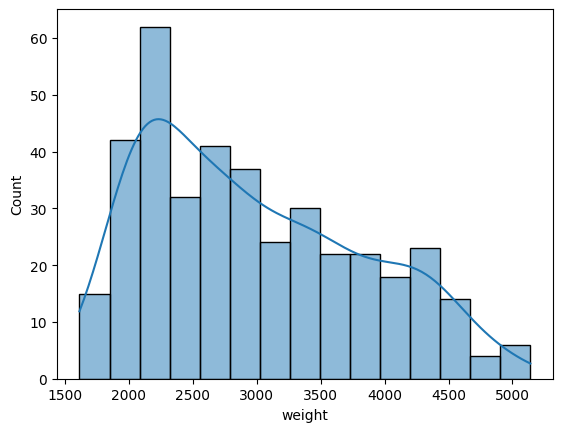

In [ ]:
# 변환하기 전의 왜도와 분포 확인
print(df['weight'].skew())
sns.histplot(df['weight'], bins = 15, kde = True)

In [ ]:
# 자연로그 = 밑이 e = 2.718.....
print(df['weight'], np.log(df['weight']))

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64 0      8.161660
1      8.214194
2      8.142063
3      8.141190
4      8.145840
         ...   
393    7.933797
394    7.663877
395    7.738488
396    7.872836
397    7.908387
Name: weight, Length: 392, dtype: float64


0.14853573209066717


<Axes: xlabel='weight', ylabel='Count'>

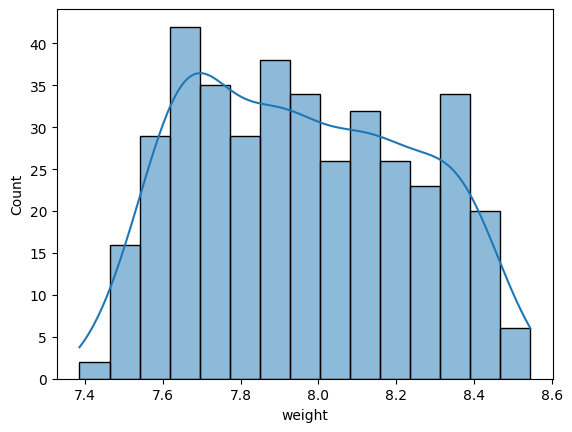

In [ ]:
# 변환 후의 왜도와 분포 확인
print(np.log(df['weight']).skew())
sns.histplot(np.log(df['weight']), bins = 15, kde = True)

In [ ]:
# 상용로그 = 밑이 10
print(df['weight'], np.log10(df['weight']))

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64 0      3.544564
1      3.567379
2      3.536053
3      3.535674
4      3.537693
         ...   
393    3.445604
394    3.328380
395    3.360783
396    3.419129
397    3.434569
Name: weight, Length: 392, dtype: float64


0.14853573209066695


<Axes: xlabel='weight', ylabel='Count'>

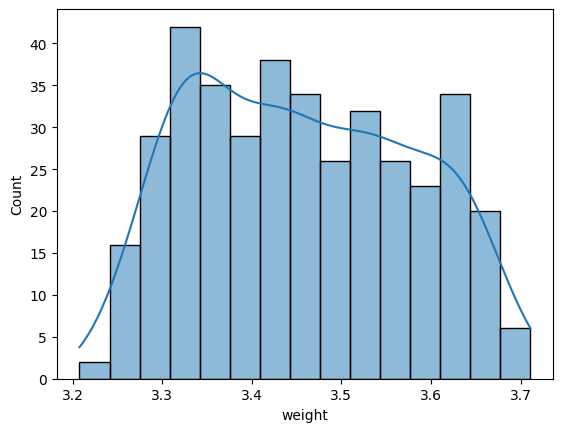

In [ ]:
# 변환 후의 왜도와 분포 확인
print(np.log10(df['weight']).skew())
sns.histplot(np.log10(df['weight']), bins = 15, kde = True)

In [ ]:
# 제곱근
print(df['weight'], np.sqrt(df['weight']))

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64 0      59.194594
1      60.770058
2      58.617404
3      58.591808
4      58.728187
         ...    
393    52.820451
394    46.151923
395    47.906158
396    51.234754
397    52.153619
Name: weight, Length: 392, dtype: float64


In [ ]:
# 역수
print(df['weight'], 1/df['weight'])

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64 0      0.000285
1      0.000271
2      0.000291
3      0.000291
4      0.000290
         ...   
393    0.000358
394    0.000469
395    0.000436
396    0.000381
397    0.000368
Name: weight, Length: 392, dtype: float64


In [ ]:
print(df['weight'], np.square(df['weight']))

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 392, dtype: float64 0      12278016.0
1      13638249.0
2      11806096.0
3      11785489.0
4      11895601.0
          ...    
393     7784100.0
394     4536900.0
395     5267025.0
396     6890625.0
397     7398400.0
Name: weight, Length: 392, dtype: float64


0.8919618430752454


<Axes: xlabel='weight', ylabel='Count'>

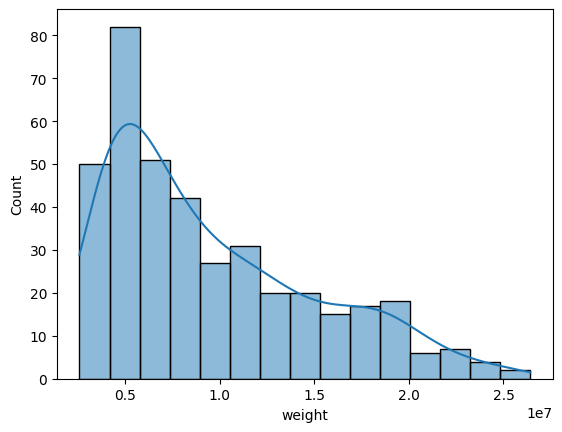

In [ ]:
# 변환 후의 왜도와 분포 확인
print(np.square(df['weight']).skew())
sns.histplot(np.square(df['weight']), bins = 15, kde = True)

## 정규화

In [ ]:
# 최소값-최대값 정규화 = MinMaxScaler
# = (관측치 - 최소값)/(최대값 - 최소값)
# 관측치 = 최소값 => 0
# 관측치 = 최대값 => 1
# 0 ~ 1 사이의 값을 가짐
df['hp_nmz2'] = (df['horsepower'] - df['horsepower'].min())/ \
                (df['horsepower'].max() - df['horsepower'].min())
df['hp_nmz2'].describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: hp_nmz2, dtype: float64

In [ ]:
# 최대절대값 정규화 = MaxAbsScaler
# = 관측치/최대값(절대값(관측치))
# 관측치 = - 최대값 => -1
# 관측치 = + 최대값 => 1
# -1 ~ 1 사이의 값을 가짐
df['hp_nmz1'] = df['horsepower']/abs(df['horsepower']).max()
print(df['hp_nmz1'])
df['hp_nmz1'].describe()

0      0.565217
1      0.717391
2      0.652174
3      0.652174
4      0.608696
         ...   
393    0.373913
394    0.226087
395    0.365217
396    0.343478
397    0.356522
Name: hp_nmz1, Length: 392, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: hp_nmz1, dtype: float64

# 미션_데이터 전처리

In [ ]:
# 데이터 불러오기에 필요한 라이브러리 로드
# Pandas: 데이터 프레임의 데이터 처리
import pandas as pd

데이터 불러오기

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/lsda02/data/Gig.xlsx')
data

,EmployeeID,HourlyWage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant
...,...,...,...,...
599,600,41.26,Automotive,Accountant
600,601,42.53,Automotive,Engineer
601,602,28.74,Construction,Other
602,603,36.96,Construction,Other


데이터 보기

In [ ]:
# 행과 열의 개수
data.shape

(604, 4)

In [ ]:
# 데이터 정보 - 자료 구조, 행과 열의 개수, 열 이름과 데이터 타입, not null 값 개수, 메모리 사용량
data.info()
# 판다스 - 문자열 object
# 파이썬 - 문자열 string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeID  604 non-null    int64  
 1   HourlyWage  604 non-null    float64
 2   Industry    594 non-null    object 
 3   Job         588 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.0+ KB


In [ ]:
# 데이터 앞부분 5개 행
data.head()

,EmployeeID,HourlyWage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant


In [ ]:
# 데이터 앞부분 10개 행
data.head(10)

,EmployeeID,HourlyWage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant
5,6,46.98,Construction,Engineer
6,7,43.03,Construction,Sales Rep
7,8,40.96,Construction,Programmer
8,9,38.89,Construction,Consultant
9,10,46.13,Construction,Accountant


In [ ]:
# 데이터 뒷부분 5개 행
data.tail()

,EmployeeID,HourlyWage,Industry,Job
599,600,41.26,Automotive,Accountant
600,601,42.53,Automotive,Engineer
601,602,28.74,Construction,Other
602,603,36.96,Construction,Other
603,604,26.09,Construction,Other


In [ ]:
# 데이터 뒷부분 10개 행
data.tail(10)

,EmployeeID,HourlyWage,Industry,Job
594,595,29.56,Construction,Consultant
595,596,45.68,Automotive,Engineer
596,597,35.71,Construction,Programmer
597,598,33.66,Construction,Engineer
598,599,49.84,Automotive,Engineer
599,600,41.26,Automotive,Accountant
600,601,42.53,Automotive,Engineer
601,602,28.74,Construction,Other
602,603,36.96,Construction,Other
603,604,26.09,Construction,Other


결측치 확인하기

In [ ]:
# 결측치 - bool
data.isnull()

,EmployeeID,HourlyWage,Industry,Job
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
599,False,False,False,False
600,False,False,False,False
601,False,False,False,False
602,False,False,False,False


In [ ]:
data.isnull().sum()

EmployeeID     0
HourlyWage     0
Industry      10
Job           16
dtype: int64

In [ ]:
data['Job'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
599    False
600    False
601    False
602    False
603    False
Name: Job, Length: 604, dtype: bool

In [ ]:
data['Job'].isnull().sum()

16

결측치 제거한 새로운 데이터셋 만들기

In [ ]:
# 결측치 모두 제거
data1 = data.dropna()
data1.head()

,EmployeeID,HourlyWage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant


In [ ]:
data1.isnull().sum()

EmployeeID    0
HourlyWage    0
Industry      0
Job           0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 603
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeID  578 non-null    int64  
 1   HourlyWage  578 non-null    float64
 2   Industry    578 non-null    object 
 3   Job         578 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.6+ KB


In [ ]:
data1 = data1.reset_index()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       578 non-null    int64  
 1   EmployeeID  578 non-null    int64  
 2   HourlyWage  578 non-null    float64
 3   Industry    578 non-null    object 
 4   Job         578 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.7+ KB


조건을 만족하는 데이터 추출

In [ ]:
# 자동차 산업(Automotive)에서 일하는 직원의 수
data1[data1["Industry"] == "Automotive"]

,index,EmployeeID,HourlyWage,Industry,Job
1,1,2,46.00,Automotive,Engineer
3,3,4,48.09,Automotive,Other
4,4,5,43.62,Automotive,Accountant
10,10,11,28.00,Automotive,Engineer
15,15,16,24.76,Automotive,Programmer
...,...,...,...,...,...
564,589,590,33.50,Automotive,Engineer
569,595,596,45.68,Automotive,Engineer
572,598,599,49.84,Automotive,Engineer
573,599,600,41.26,Automotive,Accountant


In [ ]:
data1[data1["Industry"] == "Automotive"].shape[0]

186

In [ ]:
len(data1[data1["Industry"] == "Automotive"])

186

In [ ]:
# 시간당 30달러보다 많이 받는 직원의 수
data1[data1["HourlyWage"] > 30]

,index,EmployeeID,HourlyWage,Industry,Job
0,0,1,32.81,Construction,Analyst
1,1,2,46.00,Automotive,Engineer
2,2,3,43.13,Construction,Sales Rep
3,3,4,48.09,Automotive,Other
4,4,5,43.62,Automotive,Accountant
...,...,...,...,...,...
571,597,598,33.66,Construction,Engineer
572,598,599,49.84,Automotive,Engineer
573,599,600,41.26,Automotive,Accountant
574,600,601,42.53,Automotive,Engineer


In [ ]:
data1[data1["HourlyWage"] > 30].shape[0]

515

In [ ]:
len(data1[data1["HourlyWage"] > 30])

515

In [ ]:
# 자동차 산업(Automotive)에서 일하고 시간당 30달러보다 많이 받는 직원의 수
data1[(data1["Industry"] == "Automotive") & (data1["HourlyWage"] > 30)]

,index,EmployeeID,HourlyWage,Industry,Job
1,1,2,46.00,Automotive,Engineer
3,3,4,48.09,Automotive,Other
4,4,5,43.62,Automotive,Accountant
16,16,17,47.00,Automotive,Other
17,17,18,47.25,Automotive,Other
...,...,...,...,...,...
564,589,590,33.50,Automotive,Engineer
569,595,596,45.68,Automotive,Engineer
572,598,599,49.84,Automotive,Engineer
573,599,600,41.26,Automotive,Accountant


In [ ]:
data1[(data1["Industry"] == "Automotive") & (data1["HourlyWage"] > 30)].shape[0]

178

In [ ]:
len(data1[(data1["Industry"] == "Automotive") & (data1["HourlyWage"] > 30)])

178

최저와 최고 급여

In [ ]:
# 회사 전체에서 최저와 최고 급여를 받는 직원의 시간당 임금
# 최저 급여
data1["HourlyWage"].min()

24.28

In [ ]:
data1[data1["HourlyWage"] == 24.28]

,index,EmployeeID,HourlyWage,Industry,Job
447,466,467,24.28,Construction,Engineer
524,546,547,24.28,Construction,Sales Rep
554,579,580,24.28,Construction,Accountant


In [ ]:
data1[data1["HourlyWage"] == data1["HourlyWage"].min()]

,index,EmployeeID,HourlyWage,Industry,Job
447,466,467,24.28,Construction,Engineer
524,546,547,24.28,Construction,Sales Rep
554,579,580,24.28,Construction,Accountant


In [ ]:
# 최고 급여
data1["HourlyWage"].max()

51.0

In [ ]:
data1[data1["HourlyWage"] == 51]

,index,EmployeeID,HourlyWage,Industry,Job
103,109,110,51.0,Construction,Other


In [ ]:
data1[data1["HourlyWage"] == data1["HourlyWage"].max()]

,index,EmployeeID,HourlyWage,Industry,Job
103,109,110,51.0,Construction,Other


In [ ]:
# 최저 급여
data1.sort_values(by = "HourlyWage")

,index,EmployeeID,HourlyWage,Industry,Job
447,466,467,24.28,Construction,Engineer
554,579,580,24.28,Construction,Accountant
524,546,547,24.28,Construction,Sales Rep
535,558,559,24.42,Construction,Engineer
211,220,221,24.76,Automotive,Programmer
...,...,...,...,...,...
572,598,599,49.84,Automotive,Engineer
358,372,373,49.91,Construction,Accountant
335,347,348,49.91,Construction,Accountant
74,78,79,50.00,Automotive,Engineer


In [ ]:
# 최고 급여
data1.sort_values(by = "HourlyWage", ascending = False)

,index,EmployeeID,HourlyWage,Industry,Job
103,109,110,51.00,Construction,Other
74,78,79,50.00,Automotive,Engineer
358,372,373,49.91,Construction,Accountant
335,347,348,49.91,Construction,Accountant
572,598,599,49.84,Automotive,Engineer
...,...,...,...,...,...
15,15,16,24.76,Automotive,Programmer
535,558,559,24.42,Construction,Engineer
554,579,580,24.28,Construction,Accountant
447,466,467,24.28,Construction,Engineer


자동차(Automotive)와 기술(Tech) 산업에서 근무한 최저와 최고 급여를 받는 회계사(Accountant)의 시간당 임금

In [ ]:
# 자동차 산업에서 근무하는 회계사
data2 = data1[(data1["Industry"] == "Automotive") & (data1["Job"] == "Accountant")]
data2.head()

,index,EmployeeID,HourlyWage,Industry,Job
4,4,5,43.62,Automotive,Accountant
33,35,36,38.28,Automotive,Accountant
55,58,59,42.92,Automotive,Accountant
62,66,67,41.50,Automotive,Accountant
70,74,75,42.92,Automotive,Accountant


In [ ]:
# 최저 급여
data2["HourlyWage"].min()

28.74

In [ ]:
data2[data2["HourlyWage"] == 28.74]

,index,EmployeeID,HourlyWage,Industry,Job
542,566,567,28.74,Automotive,Accountant


In [ ]:
data2[data2["HourlyWage"] == data2["HourlyWage"].min()]

,index,EmployeeID,HourlyWage,Industry,Job
542,566,567,28.74,Automotive,Accountant


In [ ]:
# 최고 급여
data2["HourlyWage"].max()

49.32

In [ ]:
data2[data2["HourlyWage"] == 49.32]

,index,EmployeeID,HourlyWage,Industry,Job
457,476,477,49.32,Automotive,Accountant


In [ ]:
data2[data2["HourlyWage"] == data2["HourlyWage"].max()]

,index,EmployeeID,HourlyWage,Industry,Job
457,476,477,49.32,Automotive,Accountant


In [ ]:
# 기술 산업에서 근무하는 회계사
data3 = data1[(data1["Industry"] == "Tech") & (data1["Job"] == "Accountant")]
data3

,index,EmployeeID,HourlyWage,Industry,Job
40,42,43,41.26,Tech,Accountant
133,140,141,49.49,Tech,Accountant
228,237,238,41.26,Tech,Accountant
280,291,292,48.87,Tech,Accountant
481,502,503,42.21,Tech,Accountant
490,511,512,41.11,Tech,Accountant
506,527,528,36.13,Tech,Accountant
517,539,540,47.13,Tech,Accountant
528,550,551,40.48,Tech,Accountant
536,559,560,40.48,Tech,Accountant


In [ ]:
# 최저 급여
data3["HourlyWage"].min()

36.13

In [ ]:
data3[data3["HourlyWage"] == 36.13]

,index,EmployeeID,HourlyWage,Industry,Job
506,527,528,36.13,Tech,Accountant


In [ ]:
data3[data3["HourlyWage"] == data3["HourlyWage"].min()]

,index,EmployeeID,HourlyWage,Industry,Job
506,527,528,36.13,Tech,Accountant


In [ ]:
# 최고 급여
data3["HourlyWage"].max()

49.49

In [ ]:
data3[data3["HourlyWage"] == 49.49]

,index,EmployeeID,HourlyWage,Industry,Job
133,140,141,49.49,Tech,Accountant


In [ ]:
data3[data3["HourlyWage"] == data3["HourlyWage"].max()]

,index,EmployeeID,HourlyWage,Industry,Job
133,140,141,49.49,Tech,Accountant


In [ ]:
# 자동차 산업에서 근무하는 회계사
data1.query('Industry == "Automotive" & Job == "Accountant"') \
     .agg(min_wage = ('HourlyWage', 'min'),
          max_wage = ('HourlyWage', 'max'))

,HourlyWage
min_wage,28.74
max_wage,49.32


In [ ]:
# 기술 산업에서 근무하는 회계사
data1.query('Industry == "Tech" & Job == "Accountant"') \
     .agg(min_wage = ('HourlyWage', 'min'),
          max_wage = ('HourlyWage', 'max'))

,HourlyWage
min_wage,36.13
max_wage,49.49


## 시계열 데이터

### 시계열 객체 변환

In [ ]:
import pandas as pd

In [ ]:
# Timestamp
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
# 현재 날짜가 문자열 object => datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.1 KB


In [ ]:
df['Date'][0]

Timestamp('2018-07-02 00:00:00')

In [ ]:
type(df['Date'][0])
# datetime64[ns] <= Timestamp 의 자료형

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# 행 인덱스
df = df.set_index('Date')

In [ ]:
# Period 날짜의 기간
dates = ["2020-01-01","2021-03-01","2022-06-01"]

In [ ]:
dates

['2020-01-01', '2021-03-01', '2022-06-01']

In [ ]:
# 1) Timestamp 로 먼저 변환해야 함
dates_ts = pd.to_datetime(dates)

In [ ]:
dates_ts

DatetimeIndex(['2020-01-01', '2021-03-01', '2022-06-01'], dtype='datetime64[ns]', freq=None)

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-period-aliases

In [ ]:
# 2) Period 로 변환
dates_ts.to_period(freq = 'D') # 연월일

PeriodIndex(['2020-01-01', '2021-03-01', '2022-06-01'], dtype='period[D]')

In [ ]:
dates_ts.to_period(freq = 'M') # 연월

PeriodIndex(['2020-01', '2021-03', '2022-06'], dtype='period[M]')

In [ ]:
dates_ts.to_period(freq = 'Y') # 연

PeriodIndex(['2020', '2021', '2022'], dtype='period[A-DEC]')

### 시계열 데이터 만들기

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [ ]:
# Timestamp 배열 = range()
sd_ts = pd.date_range(start = "2022-01-01", # 시작 날짜
                      end = None, # 끝 날짜
                      periods = 12, # Timestamp 개수
                      freq = 'MS', # 월 간격, 월 시작일
                      tz = 'Asia/Seoul')
print(sd_ts)

DatetimeIndex(['2022-01-01 00:00:00+09:00', '2022-02-01 00:00:00+09:00',
               '2022-03-01 00:00:00+09:00', '2022-04-01 00:00:00+09:00',
               '2022-05-01 00:00:00+09:00', '2022-06-01 00:00:00+09:00',
               '2022-07-01 00:00:00+09:00', '2022-08-01 00:00:00+09:00',
               '2022-09-01 00:00:00+09:00', '2022-10-01 00:00:00+09:00',
               '2022-11-01 00:00:00+09:00', '2022-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [ ]:
sd_ts = pd.date_range(start = "2022-01-01", # 시작 날짜
                      end = None, # 끝 날짜
                      periods = 12, # Timestamp 개수
                      freq = 'M', # 월 간격, 월 마지막일
                      tz = 'Asia/Seoul')
print(sd_ts)

DatetimeIndex(['2022-01-31 00:00:00+09:00', '2022-02-28 00:00:00+09:00',
               '2022-03-31 00:00:00+09:00', '2022-04-30 00:00:00+09:00',
               '2022-05-31 00:00:00+09:00', '2022-06-30 00:00:00+09:00',
               '2022-07-31 00:00:00+09:00', '2022-08-31 00:00:00+09:00',
               '2022-09-30 00:00:00+09:00', '2022-10-31 00:00:00+09:00',
               '2022-11-30 00:00:00+09:00', '2022-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')


In [ ]:
sd_ts = pd.date_range(start = "2022-01-01", # 시작 날짜
                      end = None, # 끝 날짜
                      periods = 12, # Timestamp 개수
                      freq = '3M', # 3개월 간격, 월 마지막일
                      tz = 'Asia/Seoul')
print(sd_ts)

DatetimeIndex(['2022-01-31 00:00:00+09:00', '2022-04-30 00:00:00+09:00',
               '2022-07-31 00:00:00+09:00', '2022-10-31 00:00:00+09:00',
               '2023-01-31 00:00:00+09:00', '2023-04-30 00:00:00+09:00',
               '2023-07-31 00:00:00+09:00', '2023-10-31 00:00:00+09:00',
               '2024-01-31 00:00:00+09:00', '2024-04-30 00:00:00+09:00',
               '2024-07-31 00:00:00+09:00', '2024-10-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [ ]:
# Period 배열
sd_prd = pd.period_range(start = "2022-01-01", # 시작 날짜
                         end = None, # 끝 날짜
                         periods = 6, # Period 개수 + 1 = 날짜 개수
                         freq = 'M') # 월 간격
print(sd_prd)

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]')


In [ ]:
sd_prd = pd.period_range(start = "2022-01-01", # 시작 날짜
                      end = None, # 끝 날짜
                      periods = 6, # Period 개수 + 1 = 날짜 개수
                      freq = 'H') # 1시간 간격
print(sd_prd)

PeriodIndex(['2022-01-01 00:00', '2022-01-01 01:00', '2022-01-01 02:00',
             '2022-01-01 03:00', '2022-01-01 04:00', '2022-01-01 05:00'],
            dtype='period[H]')


In [ ]:
sd_prd = pd.period_range(start = "2022-01-01", # 시작 날짜
                      end = None, # 끝 날짜
                      periods = 6, # Period 개수 + 1 = 날짜 개수
                      freq = '2H') # 2시간 간격
print(sd_prd)

PeriodIndex(['2022-01-01 00:00', '2022-01-01 02:00', '2022-01-01 04:00',
             '2022-01-01 06:00', '2022-01-01 08:00', '2022-01-01 10:00'],
            dtype='period[2H]')


### 날짜 데이터 분리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/stock-data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
df['Date_new'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   Date_new  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [ ]:
# Timestamp
# 연-월-일 데이터에서 연, 월, 일 추출
print(df['Date_new'])
print(df['Date_new'].dt.year)

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date_new, dtype: datetime64[ns]
0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: Date_new, dtype: int32


In [ ]:
print(df['Date_new'])
print(df['Date_new'].dt.month)

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date_new, dtype: datetime64[ns]
0     7
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
Name: Date_new, dtype: int32


In [ ]:
print(df['Date_new'])
print(df['Date_new'].dt.day)

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date_new, dtype: datetime64[ns]
0      2
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15     8
16     7
17     5
18     4
19     1
Name: Date_new, dtype: int32


In [ ]:
# Period
print(df['Date_new'])
print(df['Date_new'].dt.to_period(freq = 'A')) # 연

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date_new, dtype: datetime64[ns]
0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: Date_new, dtype: period[A-DEC]


In [ ]:
print(df['Date_new'])
print(df['Date_new'].dt.to_period(freq = 'M')) # 연월

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date_new, dtype: datetime64[ns]
0     2018-07
1     2018-06
2     2018-06
3     2018-06
4     2018-06
5     2018-06
6     2018-06
7     2018-06
8     2018-06
9     2018-06
10    2018-06
11    2018-06
12    2018-06
13    2018-06
14    2018-06
15    2018-06
16    2018-06
17    2018-06
18    2018-06
19    2018-06
Name: Date_new, dtype: period[M]


### 날짜 인덱싱

In [ ]:
df = df.set_index('Date_new')

In [ ]:
df

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039
2018-06-25,2018-06-25,11150,11400,11450,11000,55519
2018-06-22,2018-06-22,11300,11250,11450,10750,134805
2018-06-21,2018-06-21,11200,11350,11750,11200,133002
2018-06-20,2018-06-20,11550,11200,11600,10900,308596


In [ ]:
df.loc['2018'] # 연

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039
2018-06-25,2018-06-25,11150,11400,11450,11000,55519
2018-06-22,2018-06-22,11300,11250,11450,10750,134805
2018-06-21,2018-06-21,11200,11350,11750,11200,133002
2018-06-20,2018-06-20,11550,11200,11600,10900,308596


In [ ]:
df.loc['2018-06'] # 연월

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039
2018-06-25,2018-06-25,11150,11400,11450,11000,55519
2018-06-22,2018-06-22,11300,11250,11450,10750,134805
2018-06-21,2018-06-21,11200,11350,11750,11200,133002
2018-06-20,2018-06-20,11550,11200,11600,10900,308596
2018-06-19,2018-06-19,11300,11850,11950,11300,180656


In [ ]:
df.head()

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.loc['2018-06','High':] # 연월 & High 열부터 끝까지

,High,Low,Volume
Date_new,,,
2018-06-29,10900,9990,170253
2018-06-28,10950,10150,155769
2018-06-27,11050,10500,133548
2018-06-26,11000,10700,63039
2018-06-25,11450,11000,55519
2018-06-22,11450,10750,134805
2018-06-21,11750,11200,133002
2018-06-20,11600,10900,308596
2018-06-19,11950,11300,180656


In [ ]:
df.loc['2018-06','High':'Low'] # 연월 & High 열부터 Low 열까지

,High,Low
Date_new,,
2018-06-29,10900,9990
2018-06-28,10950,10150
2018-06-27,11050,10500
2018-06-26,11000,10700
2018-06-25,11450,11000
2018-06-22,11450,10750
2018-06-21,11750,11200
2018-06-20,11600,10900
2018-06-19,11950,11300


In [ ]:
df.loc['2018-07-02'] # 연월일

Date      2018-07-02
Close          10100
Start          10850
High           10900
Low            10000
Volume        137977
Name: 2018-07-02 00:00:00, dtype: object

In [ ]:
df.loc[['2018-07-02']]

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977


In [ ]:
df.loc['2018-06-01':'2018-06-15']

,Date,Close,Start,High,Low,Volume
Date_new,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376
2018-06-14,2018-06-14,13450,13200,13700,13150,347451
2018-06-12,2018-06-12,13200,12200,13300,12050,558148
2018-06-11,2018-06-11,11950,12000,12250,11950,62293
2018-06-08,2018-06-08,11950,11950,12200,11800,59258
2018-06-07,2018-06-07,11950,12200,12300,11900,49088
2018-06-05,2018-06-05,12150,11800,12250,11800,42485
2018-06-04,2018-06-04,11900,11900,12200,11700,25171
2018-06-01,2018-06-01,11900,11800,12100,11750,32062


In [ ]:
# difference
today = pd.to_datetime('2023-06-02')
df['day_diff'] = today - df.index

In [ ]:
df = df.set_index('day_diff')

In [ ]:
df['1801 days':'1810 days']

,Date,Close,Start,High,Low,Volume
day_diff,,,,,,
1801 days,2018-06-27,10900,10800,11050,10500,133548
1802 days,2018-06-26,10800,10900,11000,10700,63039
1803 days,2018-06-25,11150,11400,11450,11000,55519
1806 days,2018-06-22,11300,11250,11450,10750,134805
1807 days,2018-06-21,11200,11350,11750,11200,133002
1808 days,2018-06-20,11550,11200,11600,10900,308596
1809 days,2018-06-19,11300,11850,11950,11300,180656
1810 days,2018-06-18,12000,13400,13400,12000,309787


# 데이터프레임 응용

## 함수 매핑

### 개별 원소에 적용

In [ ]:
import seaborn as sns
# 시리즈 원소
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# age, fare 열 추출 + 모든 행
df = titanic.loc[:,['age','fare']]

In [ ]:
df['five'] = 5
df.head()

,age,fare,five
0,22.0,7.2500,5
1,38.0,71.2833,5
2,26.0,7.9250,5
3,35.0,53.1000,5
4,35.0,8.0500,5


In [ ]:
# 사용자 정의 함수
# 5를 더하는 함수
def add5(x):
  return x + 5
# 두 객체를 더하는 함수
def add_two(a, b):
  return a + b

In [ ]:
add5(4)

9

In [ ]:
add_two(3,4)

7

In [ ]:
print(df['age'])
df['age'].apply(add5)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


0      27.0
1      43.0
2      31.0
3      40.0
4      40.0
       ... 
886    32.0
887    24.0
888     NaN
889    31.0
890    37.0
Name: age, Length: 891, dtype: float64

In [ ]:
print(df['age'])
df['age'].apply(add_two, b = 3)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


0      25.0
1      41.0
2      29.0
3      38.0
4      38.0
       ... 
886    30.0
887    22.0
888     NaN
889    29.0
890    35.0
Name: age, Length: 891, dtype: float64

In [ ]:
print(df['age'])
# add5 함수와 같음
df['age'].apply(lambda x: x + 5)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


0      27.0
1      43.0
2      31.0
3      40.0
4      40.0
       ... 
886    32.0
887    24.0
888     NaN
889    31.0
890    37.0
Name: age, Length: 891, dtype: float64

In [ ]:
print(df['age'])
df['age'].apply(lambda x: add5(x))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


0      27.0
1      43.0
2      31.0
3      40.0
4      40.0
       ... 
886    32.0
887    24.0
888     NaN
889    31.0
890    37.0
Name: age, Length: 891, dtype: float64

In [ ]:
print(df['age'])
df['age'].apply(lambda x: add_two(x, b = 3))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


0      25.0
1      41.0
2      29.0
3      38.0
4      38.0
       ... 
886    30.0
887    22.0
888     NaN
889    29.0
890    35.0
Name: age, Length: 891, dtype: float64

In [ ]:
# 데이터프레임 원소
print(df)
df.applymap(add5)

      age     fare  five
0    22.0   7.2500     5
1    38.0  71.2833     5
2    26.0   7.9250     5
3    35.0  53.1000     5
4    35.0   8.0500     5
..    ...      ...   ...
886  27.0  13.0000     5
887  19.0  30.0000     5
888   NaN  23.4500     5
889  26.0  30.0000     5
890  32.0   7.7500     5

[891 rows x 3 columns]


,age,fare,five
0,27.0,12.2500,10
1,43.0,76.2833,10
2,31.0,12.9250,10
3,40.0,58.1000,10
4,40.0,13.0500,10
...,...,...,...
886,32.0,18.0000,10
887,24.0,35.0000,10
888,NaN,28.4500,10
889,31.0,35.0000,10


In [ ]:
print(df)
print(df.applymap(lambda x: x + 5))
print(df.applymap(lambda x: add5(x)))

      age     fare  five
0    22.0   7.2500     5
1    38.0  71.2833     5
2    26.0   7.9250     5
3    35.0  53.1000     5
4    35.0   8.0500     5
..    ...      ...   ...
886  27.0  13.0000     5
887  19.0  30.0000     5
888   NaN  23.4500     5
889  26.0  30.0000     5
890  32.0   7.7500     5

[891 rows x 3 columns]
      age     fare  five
0    27.0  12.2500    10
1    43.0  76.2833    10
2    31.0  12.9250    10
3    40.0  58.1000    10
4    40.0  13.0500    10
..    ...      ...   ...
886  32.0  18.0000    10
887  24.0  35.0000    10
888   NaN  28.4500    10
889  31.0  35.0000    10
890  37.0  12.7500    10

[891 rows x 3 columns]
      age     fare  five
0    27.0  12.2500    10
1    43.0  76.2833    10
2    31.0  12.9250    10
3    40.0  58.1000    10
4    40.0  13.0500    10
..    ...      ...   ...
886  32.0  18.0000    10
887  24.0  35.0000    10
888   NaN  28.4500    10
889  31.0  35.0000    10
890  37.0  12.7500    10

[891 rows x 3 columns]


### 시리즈 객체에 적용

In [ ]:
# 1) 반환하는 값이 여러 개인 경우
# 널값에 대한 불 인덱스를 반환하는 함수
def mv_find(series):
  return series.isnull()

In [ ]:
# 열 단위 = 시리즈 객체
df.apply(mv_find, axis = 0)

,age,fare,five
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,True,False,False
889,False,False,False


In [ ]:
# 2) 반환하는 값이 하나인 경우
# 범위를 구하는 함수
def range_xy(series):
  return series.max() - series.min()

In [ ]:
# 열 단위 = 시리즈 객체
df.apply(range_xy, axis = 0)

age      79.5800
fare    512.3292
five      0.0000
dtype: float64

In [ ]:
# 행 단위
df['age_plus_five'] = df.apply(lambda x: x['age'] + x['five'], axis = 1)

In [ ]:
df['age_plus_five']

0      27.0
1      43.0
2      31.0
3      40.0
4      40.0
       ... 
886    32.0
887    24.0
888     NaN
889    31.0
890    37.0
Name: age_plus_five, Length: 891, dtype: float64

In [ ]:
df.apply(lambda x: add_two(x['age'], x['five']), axis = 1)

0      27.0
1      43.0
2      31.0
3      40.0
4      40.0
       ... 
886    32.0
887    24.0
888     NaN
889    31.0
890    37.0
Length: 891, dtype: float64

### 데이터프레임 객체에 적용

In [ ]:
df = df.loc[:, 'age':'fare']

In [ ]:
df1 = df.pipe(mv_find)

In [ ]:
df1

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


In [ ]:
type(df1) # 데이터프레임 = 함수 적용된 결과는 시리즈 개수와 일치 (= 891개)

pandas.core.frame.DataFrame

In [ ]:
def mv_count(series):
  return mv_find(series).sum()

In [ ]:
df2 = df.pipe(mv_count)

In [ ]:
df2

age     177
fare      0
dtype: int64

In [ ]:
type(df2) # 시리즈 = 함수 적용된 결과가 하나(열마다) = 열 개수

pandas.core.series.Series

In [ ]:
def mv_count_total(series):
  return mv_count(series).sum()

In [ ]:
df3 = df.pipe(mv_count_total)

In [ ]:
df3

177

In [ ]:
type(df3) # 개별값 = 함수 적용된 결과가 하나(전체) = 전체가 하나

numpy.int64

## 열 재구성

### 열 순서 변경

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

In [ ]:
# 데이터 불러오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 열 선택
df = titanic.loc[:,'survived':'age']
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age'], dtype='object')

In [ ]:
# 열 이름을 리스트로 저장
columns = list(df.columns.values)
columns

['survived', 'pclass', 'sex', 'age']

In [ ]:
# 열 이름 알파벳 순서대로 정렬 = 오름차순
# = 낮은 값(앞에 나오는 문자)에서 높은 값(뒤에 나오는 문자)으로 정렬
columns_asc = sorted(columns)
columns_asc

['age', 'pclass', 'sex', 'survived']

In [ ]:
# 열 이름 오름차순으로 추출
df[columns_asc]
# = df[['age', 'pclass', 'sex', 'survived']]

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0
...,...,...,...,...
886,27.0,2,male,0
887,19.0,1,female,1
888,NaN,3,female,0
889,26.0,1,male,1


In [ ]:
# 열 순서를 반대로 만들어 리스트로 저장
columns_dsc = list(reversed(columns_asc))
columns_dsc

['survived', 'sex', 'pclass', 'age']

In [ ]:
# 열 이름 내림차순으로 추출
df[columns_dsc]
# = df[['survived', 'sex', 'pclass', 'age']]

,survived,sex,pclass,age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0
...,...,...,...,...
886,0,male,2,27.0
887,1,female,1,19.0
888,0,female,3,NaN
889,1,male,1,26.0


In [ ]:
# 열 순서를 사용자 마음대로 변경하여 추출
columns_modify = ['sex', 'age', 'pclass', 'survived']
df[columns_modify]

,sex,age,pclass,survived
0,male,22.0,3,0
1,female,38.0,1,1
2,female,26.0,3,1
3,female,35.0,1,1
4,male,35.0,3,0
...,...,...,...,...
886,male,27.0,2,0
887,female,19.0,1,1
888,female,NaN,3,0
889,male,26.0,1,1


### 열 분리

In [ ]:
# 라이브러리 불러오기
import pandas as pd

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# 각 행마다 "-" 로 분할하여 리스트 형태로 저장
dates = df['Date'].str.split("-")

In [ ]:
# 열 분리하여 저장
df['year'] = dates.str.get(0)
df['month'] = dates.str.get(1)
df['day'] = dates.str.get(2)
df.head()

,Date,Close,Start,High,Low,Volume,year,month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,06,26


## 필터링

### 불 인덱싱

In [ ]:
import seaborn as sns

In [ ]:
# = 불 인덱스를 이용한 데이터 추출
# 불 인덱스 = 불린 인덱스 = 불리안/언 인덱스
# 조건을 만족하는 = 불 인덱스에서 True 에 해당하는 데이터 추출
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 나이가 10세 이상 & 20세 미만인 고객 = 10대 고객
age1 = (titanic['age'] >= 10) & (titanic['age'] < 20)

In [ ]:
# 불 인덱싱
df_1 = titanic.loc[age1,:]
df_1.head()
# # 같은 결과
# titanic.loc[age1]
# titanic[age1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
# 나이가 10세 미만 & 성별이 여성인 고객 = 10세 미만 여자아이들
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
age2 = (titanic['age'] < 10) & (titanic['sex'] == 'female')

In [ ]:
# 불 인덱싱
df_2 = titanic.loc[age2,:]
df_2.head()
# # 같은 결과
# titanic.loc[age2]
# titanic[age2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
df_2.shape

(30, 15)

In [ ]:
# 나이가 10세 미만 or 성별이 여성인 고객
age3 = (titanic['age'] < 10) | (titanic['sex'] == 'female')

In [ ]:
# 불 인덱싱
df_3 = titanic.loc[age3,:]
df_3.head()
# # 같은 결과
# titanic.loc[age3]
# titanic[age3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False


In [ ]:
df_3.shape

(346, 15)

### isin 메소드

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# sibsp = 동반한 sibling 형제자매 & spouse 배우자 사람 수
# sibsp 값이 3, 4, 5 인 승객 추출
sb1 = titanic['sibsp'] == 3
sb2 = titanic['sibsp'] == 4
sb3 = titanic['sibsp'] == 5

In [ ]:
df_sb1 = titanic[sb1 | sb2 | sb3]
df_sb1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
# isin 메소드를 이용하여 변환
sib = titanic['sibsp'].isin([3,4,5])
df_sb2 = titanic[sib]
df_sb2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
